# Noise: Red, White, Pink


## White noise
White noise is an uncorrelated, independent and completely random noise. An example would be counting photon limited (e.g. Poison distribution).  For instance, we have a simple periodic signal but we don't know the exact brightness of each data point because of this uncertainty.  When you take the Fourier transform or create the power spectrum, it is like you are superimposing an infinite set of frequencies on top of the real signal to account for every unreal statistical variation; there is no preference for a particular frequency because it is *completely* random.

Often in astronomy, measurements are not independent because of changes in airmass, atmospheric conditions, tracking, flafielding, etc. which cause correlation between neighboring data points. Take for example a planetary transit. The uncertainty in the depth of the transit is $$ \sigma_d  = \frac{\sigma_i}{\sqrt(n)}, $$ where $\sigma_i$ are the uncertainties of all the datapoints inside the transient and $n$ is the number of data points.

$$ \sigma^2_d =  \frac{\sigma_i^2}{\sqrt(n)} + \frac{1}{\sqrt(n^2)} \sum_{i\neq j} C_{ij},$$

where $C_{ij}$ are the covariance coefficients. Correlated noise occured when the 2d term is not much smaller than the 1st.

<img src="1.png">

<img src="2.png">

<a href="http://cdsads.u-strasbg.fr/abs/2006MNRAS.373..231P">2006MNRAS.373..231P</a>

Genreally the power spectrum $P \propto \frac{1}{\nu^\alpha}$. For white noise $\alpha = 0$ (no frequency dependence). One particular case is red or brownian noise where $\alpha = 2$ or the random walk.



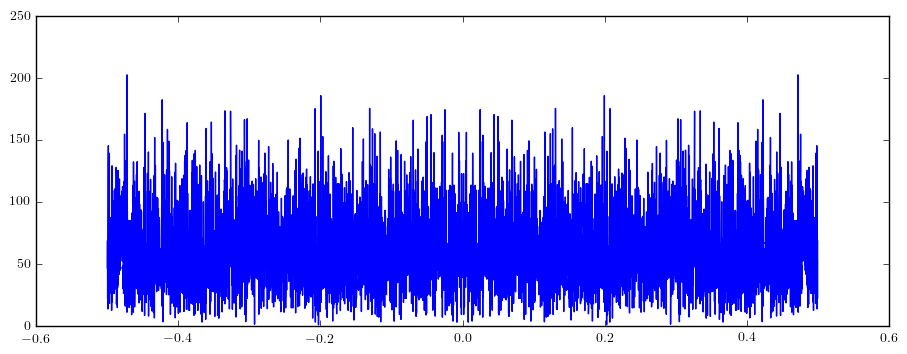

In [1]:
import random
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
%matplotlib inline

N = 5000

t = np.linspace(0, 1, N)
wn = np.random.normal(loc=0.0, scale=1.0, size=N)

DFT = np.fft.fft(wn)
freq = np.fft.fftfreq(wn.size)
figure = plt.figure(figsize=(11, 4.0))
plt.plot(freq, np.abs(DFT))
plt.show()

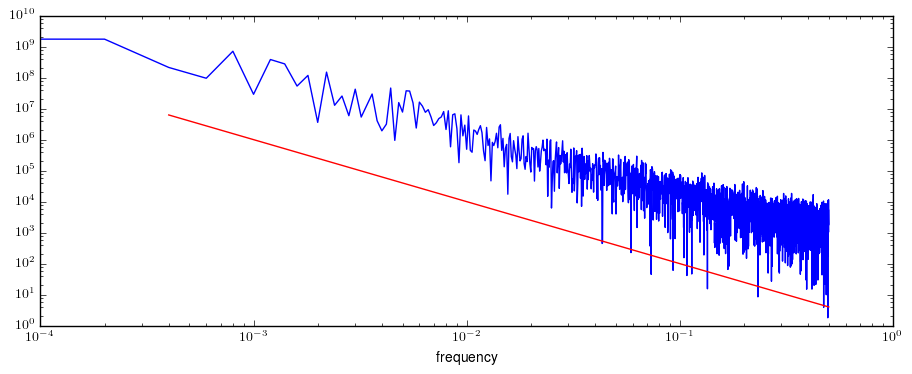

In [2]:
rn = []
for i in range(1,len(wn)+1):
    rn.append(sum(wn[:i]))

rn = np.array(rn)
DFT = np.fft.fft(rn)
freq = np.fft.fftfreq(rn.size)
figure = plt.figure(figsize=(11, 4.0))
plt.plot(freq[:N/2], np.abs(DFT[:N/2])**2)

x = np.linspace(freq[2], freq[N/2-1], 50)
y = map(lambda a: 1.0/a**2,x)

plt.plot(x,y,'r')

plt.yscale("log")
plt.xscale("log")
plt.xlabel("frequency")
plt.show()

## Noises
$S(f) \propto f^\alpha$ <br>
$\alpha = 0$ - white noise <br>
$-2 < \alpha < 0$ - pink noise <br>
$\alpha \equiv 1 $ - "pure" pink noise (a.k.a. flicker noise)<br>
$\alpha \equiv 2 $ - red noise <br>
$S(f)$ is related to the autocorrelation function $r_{xx}(\tau)=E[x(t)x(t-\tau)]$ by the <a href="https://en.wikipedia.org/wiki/Wiener%E2%80%93Khinchin_theorem">Wiener–Khinchin theorem</a>. A quantity with a 1/f power spectrum cannot be characterized by a single correlation time. In fact, the 1/f spectrum implies some correlation in x(t) over all time scales corresponding to the frequency range for which S(f) is 1/f-like. In general, a negative slope for S(t) implies some degree of correlation in x(t) over time scales of roughly $1/2\pi f$. A steep slope implies a higher degree of correlation than a shallow slope.

<img src="3.jpg">


# Damped random walk (a.k.a. AR(1) - autoregressive process of oder 1  )
$x_i = \phi x_{i-1} + w_i$, where $0<\phi<1$ it sets a characteristic timescale $\tau$ after which the contribution of the previous value of the series will be relatively insignificant, i.e. $\tau$ is the *decorelation timescale*.
AR(1) process is memoryless or Markov process. <br><br>

$ PSD(f) = \frac{1}{f^2}$  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  for $f>1/\tau$<br>
$ PSD(f) =const$     &nbsp;&nbsp;&nbsp;   for $f<1/\tau$

## Quasars follow DRW process
<img src="4.png">

MacLeod et al. (2010, 2012) found that $\tau$ increases with increasing wavelength and increases with increasing BH mass.
If wavelength is a proxy for radius in the accretion disk, this implies that the characteristic time scales are longer
and the variability amplitudes are smaller in the outer regions than in the inner regions.